In [1]:
from scripts.halo_analysis_scripts import *
from scripts.analytic_modeling import Simulation, Potential_FIRE
from astropy import units as un, constants as cons
from joblib import Parallel, delayed
import matplotlib.colors as colors
from pprint import pprint
%matplotlib inline
plt.style.reload_library()
plt.style.use(['science', 'high-vis'])
import smplotlib

import WiersmaCooling as Cool
import cooling_flow as CF

Bad value in file '/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/smplotlib/smplot.mplstyle', line 617 ("hist.bins: 'auto'  # The default number of histogram bins or 'auto'."): Key hist.bins: 'hist.bins' must be one of ['auto', 'sturges', 'fd', 'doane', 'scott', 'rice', 'sqrt'], an int or a sequence of floats


In [2]:
m12f = Simulation(simdir='/scratch1/08044/tg873432/fire2_core_no_md/m12f_r57000', snapnum=600, cachesim=True)

In [3]:
m12q = Simulation(simdir='/scratch1/08044/tg873432/fire2_core_no_md/m12q_r57000', snapnum=600, cachesim=True)

In [2]:
m12f_fire2 = Simulation(simdir='/scratch1/08044/tg873432/fire2_core_no_md/m12f_r57000', snapnum=600)
m12q_fire2 = Simulation(simdir='/scratch1/08044/tg873432/fire2_core_no_md/m12q_r57000', snapnum=600)

m12f_fire3 = Simulation(simdir=PaperSimNames['m12f_NoBH'], snapnum=500)
m12q_fire3 = Simulation(simdir=PaperSimNames['m12q_NoBH'], snapnum=500)

In [2]:
PaperSimNames = {
    'm12f_NoBH_fire3': 'm12f_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5',
    'm12q_NoBH_fire3': 'm12q_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5',
    'm12f_NoBH_fire2': 'm12f_r57000',
    'm12q_NoBH_fire2': 'm12q_r57000'
}

In [3]:
# Load snapshots from z=0.5 to 0
res = {}
for k,v in PaperSimNames.items():
    snaps = sorted([int(f.split('_')[-1].split('.')[0]) for f in os.listdir('../data/simcachev2_Khist_outflow/') if v in f])
    print(k, v)
    print(snaps)
    print()
    res[k] = Parallel(n_jobs=-1, verbose=0)(delayed(Simulation)(v, s) for s in snaps)

m12f_NoBH_fire3 m12f_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
[257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 4

/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rco

m12q_NoBH_fire3 m12q_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
[257, 258, 259, 262, 263, 264, 267, 268, 269, 270, 271, 272, 274, 276, 278, 281, 282, 285, 287, 288, 289, 290, 292, 293, 294, 295, 296, 297, 298, 299, 300, 302, 303, 305, 306, 307, 308, 310, 311, 313, 314, 315, 318, 320, 321, 323, 324, 325, 329, 330, 331, 332, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 352, 353, 354, 356, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 4

/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:399: RuntimeWarning: invalid value encountered in float_scalars
  self.Z2Zsun = np.sum(10**self.pro['Z_Mweighted'][idxZavg] * self.pro['TotalMass:PartType0'][idxZavg]) / np.sum(self.pro['TotalMass:PartType0'][idxZavg])
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/core/_metho

m12f_NoBH_fire2 m12f_r57000
[381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 5

/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:137: RuntimeWarning: invalid value encountered in log
  lnvcr = np.gradient(np.log(vcr), np.log(Mr['r']))
/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:137: RuntimeWarning: invalid value encountered in log
  lnvcr = np.gradient(np.log(vcr), np.log(Mr['r']))
/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:137: RuntimeWarning: invalid value encountered in log
  lnvcr = np.gradient(np.log(vcr), np.log(Mr['r']))
/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:137: RuntimeWarning: invalid value encountered in log
  lnvcr = np.gradient(np.log(vcr), np.log(Mr['r']))
/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:137: RuntimeWarning: invalid value encountered in log
  lnvcr = np.gradient(np.log(vcr), np.log(Mr['r']))
/work2/08044/tg873432/frontera/projects/massive-halos/s

m12q_NoBH_fire2 m12q_r57000
[381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 5

/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:399: RuntimeWarning: invalid value encountered in float_scalars
  self.Z2Zsun = np.sum(10**self.pro['Z_Mweighte

m12f_r57000
-0.6116360605536503 11.082297264927101
m12f_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
-0.6180671806464252 5.086330565660414
m12q_r57000
-0.6105832382942985 2.9582928232214143
m12q_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
-0.595630123431046 6.076584562911069


(-1.3010299956639813, 0.8557667517692242)

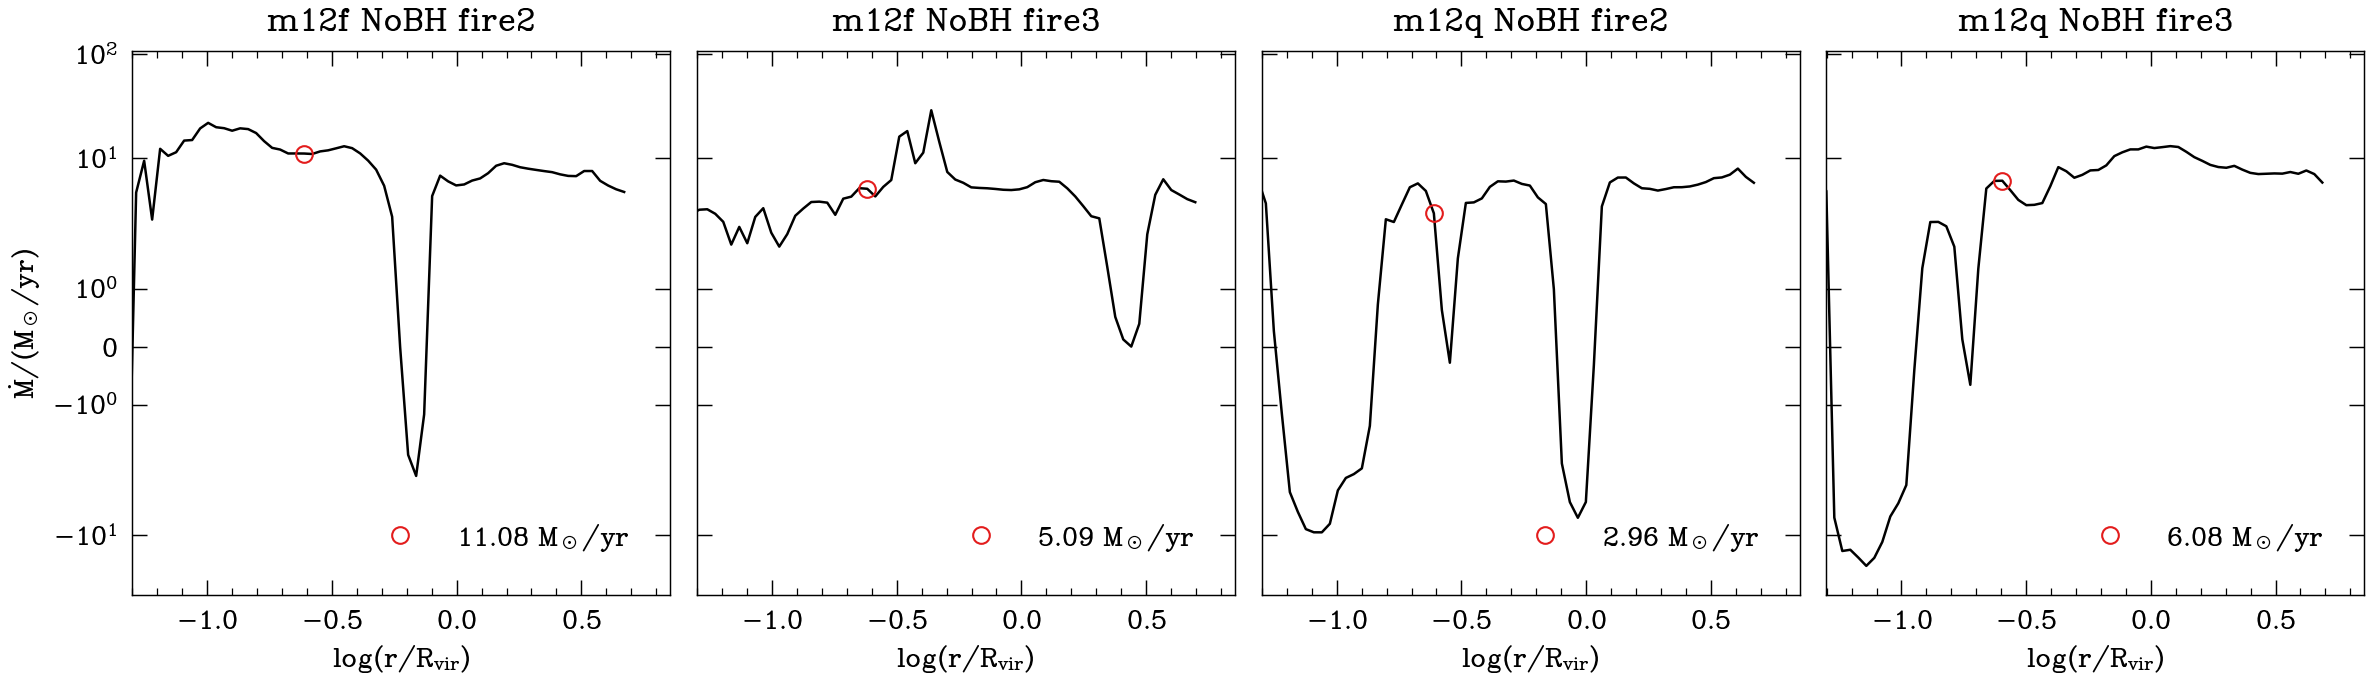

In [39]:
sims = [m12f_fire2, m12f_fire3, m12q_fire2, m12q_fire3]
labels = ['m12f NoBH fire2', 'm12f NoBH fire3', 'm12q NoBH fire2', 'm12q NoBH fire3']

fig, axes = plt.subplots(1, len(sims), sharex=True, sharey='row', gridspec_kw={'wspace': .05, 'hspace':.15}, figsize=[4.8*len(sims),4.8*1], dpi=150)
for i,Sim in enumerate(sims):
    print(Sim.simname)
    axes[i].set_title(labels[i])
    axes[i].plot(np.log10(Sim.Mdot_profile['rmid_Mdot']/Sim.pro['Rvir']), Sim.Mdot_profile['Mdot'])
    axes[0].set_ylabel('$\dot{{M}}/(M_\odot/\mathrm{{yr}})$')
    
    idx25 = np.argmin(np.abs(Sim.Mdot_profile['rmid_Mdot']/Sim.pro['Rvir'] - 0.25))
    print(np.log10(Sim.Mdot_profile['rmid_Mdot']/Sim.pro['Rvir'])[idx25], Sim.Mdot_profile['Mdot'][idx25])
    axes[i].plot(np.log10(Sim.Mdot_profile['rmid_Mdot']/Sim.pro['Rvir'])[idx25], Sim.Mdot_profile['Mdot'][idx25], 'o', label=f"{Sim.Mdot_profile['Mdot'][idx25]:.2f}" + r' $M_\odot/\mathrm{{yr}}$')
    axes[i].legend(loc=4)
for ax in axes: ax.set_xlabel(r'$\log (r/R_{vir})$')
axes[0].set_yscale('symlog')
axes[0].set_xlim(np.log10(0.05))

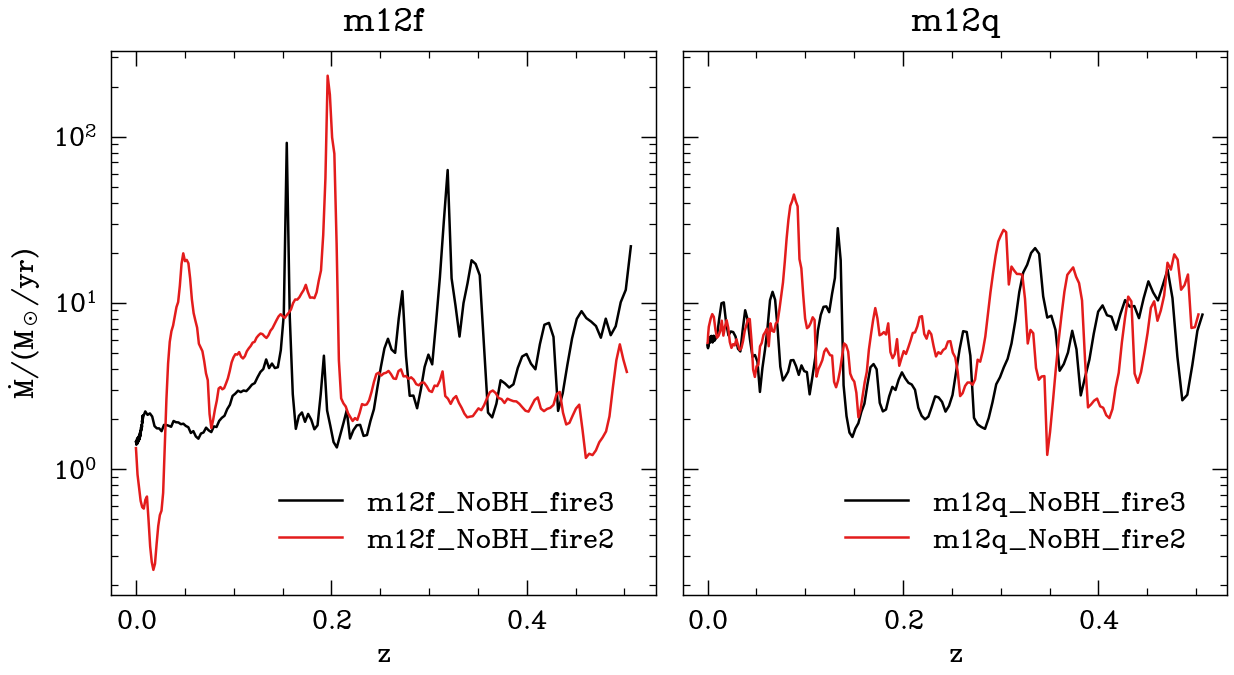

In [39]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey='row', gridspec_kw={'wspace': .05, 'hspace':.15}, figsize=[4.8*2,4.8*1], dpi=150)
for i,(k,v) in enumerate(res.items()):
    i = 0 if 'm12f' in k else 1
    axes[i].set_title(k.split('_')[0])
    
    y = [-Sim.Mdot_profile['Mdot'][np.argmin(np.abs(Sim.Mdot_profile['rmid_Mdot']/Sim.pro['Rvir'] - 0.25))] for Sim in v]
    x = [Sim.Redshift[()] for Sim in v]
    axes[i].plot(x,y, label=k)
    axes[i].legend(loc=4)
    
    axes[0].set_ylabel('$\dot{{M}}/(M_\odot/\mathrm{{yr}})$')
for ax in axes: ax.set_xlabel(r'$z$')
axes[0].set_yscale('log')

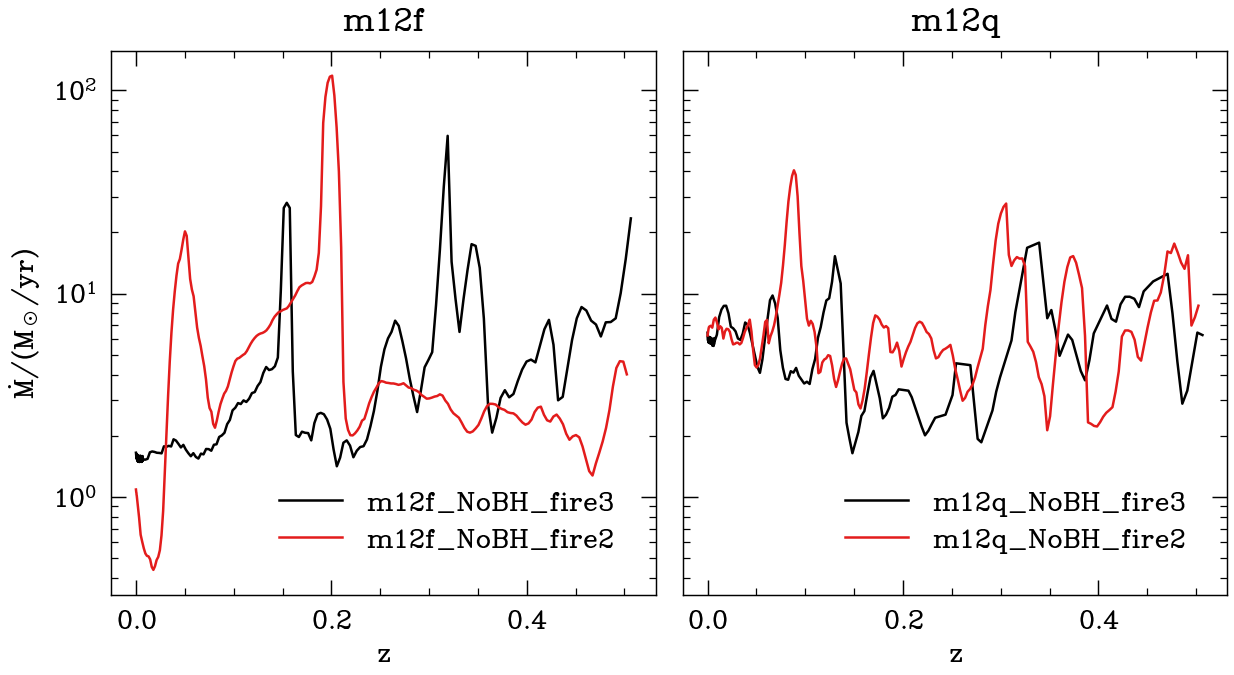

In [4]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey='row', gridspec_kw={'wspace': .05, 'hspace':.15}, figsize=[4.8*2,4.8*1], dpi=150)
for i,(k,v) in enumerate(res.items()):
    i = 0 if 'm12f' in k else 1
    axes[i].set_title(k.split('_')[0])

    y = [Sim.Mdot_profile['Mdot_outflows'][1] for Sim in v]
    x = [Sim.Redshift[()] for Sim in v]
    axes[i].plot(x,y, label=k)
    axes[i].legend(loc=4)
    
    axes[0].set_ylabel('$\dot{{M}}/(M_\odot/\mathrm{{yr}})$')
for ax in axes: ax.set_xlabel(r'$z$')
axes[0].set_yscale('log')

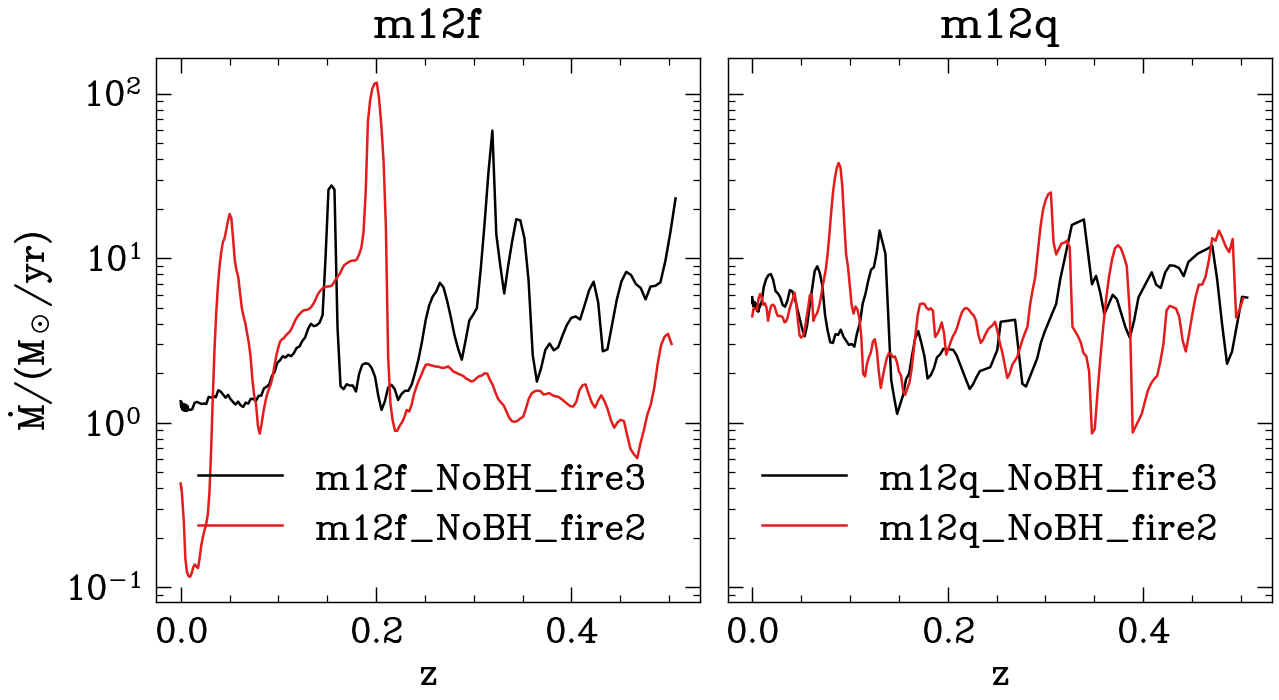

In [30]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey='row', gridspec_kw={'wspace': .05, 'hspace':.15}, figsize=[4.8*2,4.8*1], dpi=150)
for i,(k,v) in enumerate(res.items()):
    i = 0 if 'm12f' in k else 1
    axes[i].set_title(k.split('_')[0])

    y = [Sim.Mdot_profile['Mdot_outflows'][2] for Sim in v]
    x = [Sim.Redshift[()] for Sim in v]
    axes[i].plot(x,y, label=k)
    axes[i].legend(loc=4)
    
    axes[0].set_ylabel('$\dot{{M}}/(M_\odot/\mathrm{{yr}})$')
for ax in axes: ax.set_xlabel(r'$z$')
axes[0].set_yscale('log')

In [4]:
plt.rcParams.update({'font.size': 20})

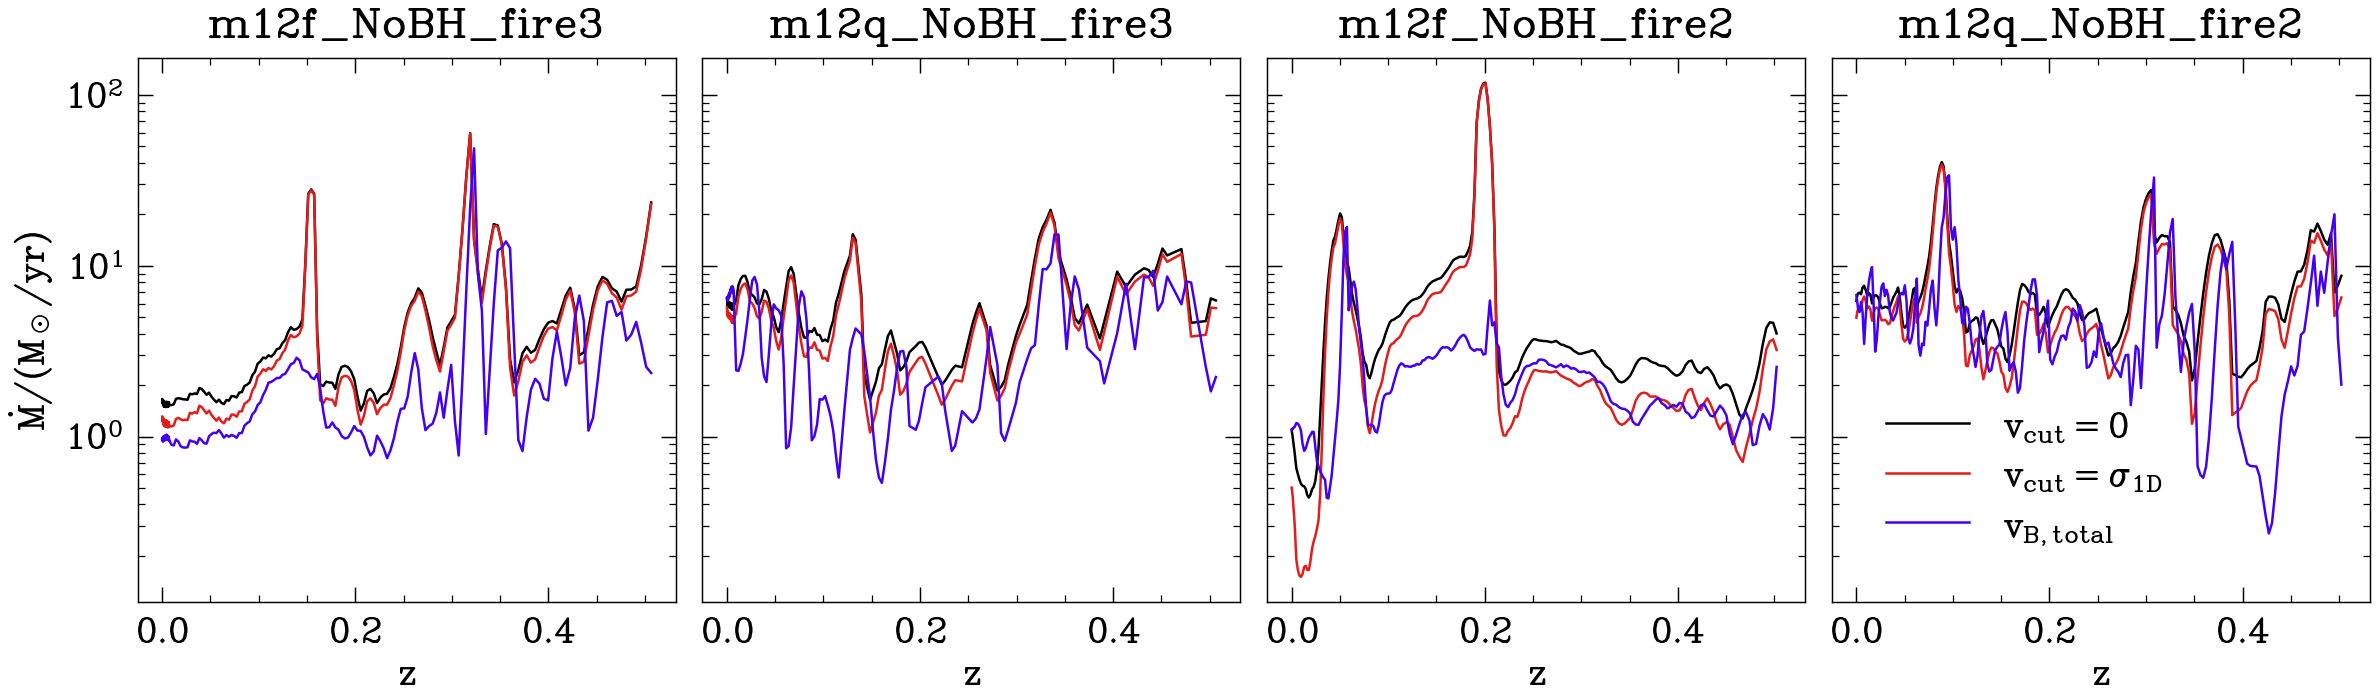

In [5]:
fig, axes = plt.subplots(1, 4, sharex=True, sharey='row', gridspec_kw={'wspace': .05, 'hspace':.15}, figsize=[4.8*4,4.8*1], dpi=150)
for i,(k,v) in enumerate(res.items()):
    axes[i].set_title(k)

    for j,l in zip(range(1,4),[r'$v_{\mathrm{cut}}=0$',r'$v_{\mathrm{cut}}=\sigma_{\mathrm{1D}}$','$v_{\mathrm{B,total}}$']):
        y = [Sim.Mdot_profile['Mdot_outflows'][j] for Sim in v]
        x = [Sim.Redshift[()] for Sim in v]
        axes[i].plot(x,y, label=l)
axes[-1].legend(loc=3)
axes[0].set_ylabel('$\dot{{M}}/(M_\odot/\mathrm{{yr}})$')
for ax in axes: ax.set_xlabel(r'$z$')
axes[0].set_yscale('log')

In [4]:
Sim = res['m12f_NoBH_fire3'][-1]
Rlow, Rhigh = 0.66875, 0.66875
Sim.transonic_solution, Sim.R_sonic_mid = Sim.binary_search_R_sonic(Rlow*un.kpc, Rhigh*un.kpc)

3.728708428482426 solMass / yr
0.66875 kpc
3.7225354149823184 solMass / yr


In [26]:
Sim = res['m12q_NoBH_fire2'][-20]
Rlow, Rhigh = .1, .2
Sim.transonic_solution, Sim.R_sonic_mid = Sim.binary_search_R_sonic(Rlow*un.kpc, Rhigh*un.kpc)

-6.949864008857368 solMass / yr
0.1 kpc


KeyboardInterrupt: 

In [9]:
plt.rcParams.update({'font.size': 18})
def colormap(k, ax, sim):
    d = getattr(sim, f'cmap_{k}')
    im = ax.pcolormesh(d['X'], d['Y'], d['H'], cmap='Reds', norm=colors.SymLogNorm(linthresh=0.03, vmin=0, vmax=1))
    return im
def makecoolingflow(Sims, fname=None):
    
    ylabels = [r'$\log \left< n_H / \mathrm{cm}^{-3} \right>$', 
            profilelabels['T lin'],
            r'$ < \mathcal{M} >$',
            r'$\log \left< t_{\mathrm{cool}} / \mathrm{Gyr} \right>$',
            r'$\log < K >$'
            ]

    prolabels = ['nH', 'T', 'MachNumber', 'tcool', 'K']
    
    fig, axes = plt.subplots(len(ylabels), len(Sims), sharex='col', sharey='row', gridspec_kw={'wspace': .05, 'hspace':.25}, figsize=[4.8*len(Sims),4.8*len(ylabels)], dpi=150, facecolor='w')
    
    for mi,Sim in enumerate(Sims):
        pro = Sim.pro
        rmid = pro['rmid']*pro['Rvir']

        axes[3,mi].axhline(np.log10(Sim.tHubble), label=r'$t_H$', c='k')
        #TODO axes[3,mi].axhline(np.log10(Sim.tHubble * (1+Sim.Redshift)**(-3/2)), c='r')
        axes[3,mi].axvline(np.log10(Sim.Rcool), label=r'$R_{\mathrm{cool}}$', c='k', ls='-.')
        if mi==2: axes[3,mi].legend()

        axes[-1,mi].set_xlabel('$\log (r/\mathrm{pkpc})$')

        # Add FIRE-3 curves
        for ax, ylabel, prolabel in zip(axes[:,mi], ylabels, prolabels):
            ax.set_xlim(.4,2.7); print(np.log10(1.2*pro['Rvir']))
            # ax.axvline(np.log10(0.05*pro['Rvir']))
            ax.axvline(np.log10(Sim.Rcool), c='k', ls='-.')
            ax.set_xlim(np.log10(0.05*pro['Rvir']))
            ax.plot(np.log10(rmid), pro[prolabel], 'k--', label='FIRE')
            ax.xaxis.set_tick_params(labelbottom=True)
            ax.set_xlabel('$\log (r/\mathrm{pkpc})$')
            if mi==0: ax.set_ylabel(ylabel)
            if prolabel=='nH': ax.set_title([k for k,v in PaperSimNames.items() if v==Sim.simname][0])#ax.set_title(Sim.simname.split('_')[0])
        for ax in axes[(0,2,3),0].flatten():
            ax.set_xlim(ax.get_xlim())
            ax.set_ylim(ax.get_ylim())
        axes[1,0].set_ylim(5,7.5)
        axes[2,mi].set_ylim(-1,1)
        axes[4,0].set_ylim(12,14.75)
        # Add FIRE-3 colormaps
        im = colormap('nH', axes[0,mi], Sim)
        colormap('T', axes[1,mi], Sim)
        colormap('MachNumber', axes[2,mi], Sim)
        colormap('tcool', axes[3,mi], Sim)
        # colormap('Z', axes[4,mi], Sim)
        colormap('K', axes[4,mi], Sim)

        # Add cooling flow Rcirc solution curves
        res = Sim.transonic_solution#stalled_solution#
        res_x = np.log10(res.Rs().to(un.kpc).value)

        axes[0,mi].plot(res_x, np.log10(res.nHs().to(un.cm**-3).value), label=f'$\dot{{M}}={res.Mdot.value:.2f}\ M_\odot/\mathrm{{yr}}$')
        axes[1,mi].plot(res_x, np.log10(res.Ts().to(un.K).value))
        axes[2,mi].plot(res_x, res.Ms())
        axes[3,mi].plot(res_x, np.log10(res.t_cools().to(un.Gyr).value))
        
        axes[4,mi].plot(res_x, np.log10((res.P2ks().to(un.K/un.cm**3) / (res.rhos().to(un.Msun/un.kpc**3)/1e10)**(5/3)).value))

        # axes[0,mi].set_xlim(0.4,3)
        axes[0,mi].legend(loc=3)

    # Add the colorbar to the figure
    cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.3]) # [left, bottom, width, height]
    cbar = fig.colorbar(im, cax=cbar_ax, orientation='vertical')
    cbar.set_label('radial bin fraction')
    fig.tight_layout()
    if fname: plt.savefig(fname, bbox_inches='tight')

2.5422440663405905
2.5422440663405905
2.5422440663405905
2.5422440663405905
2.5422440663405905
2.5678946761372665
2.5678946761372665
2.5678946761372665
2.5678946761372665
2.5678946761372665


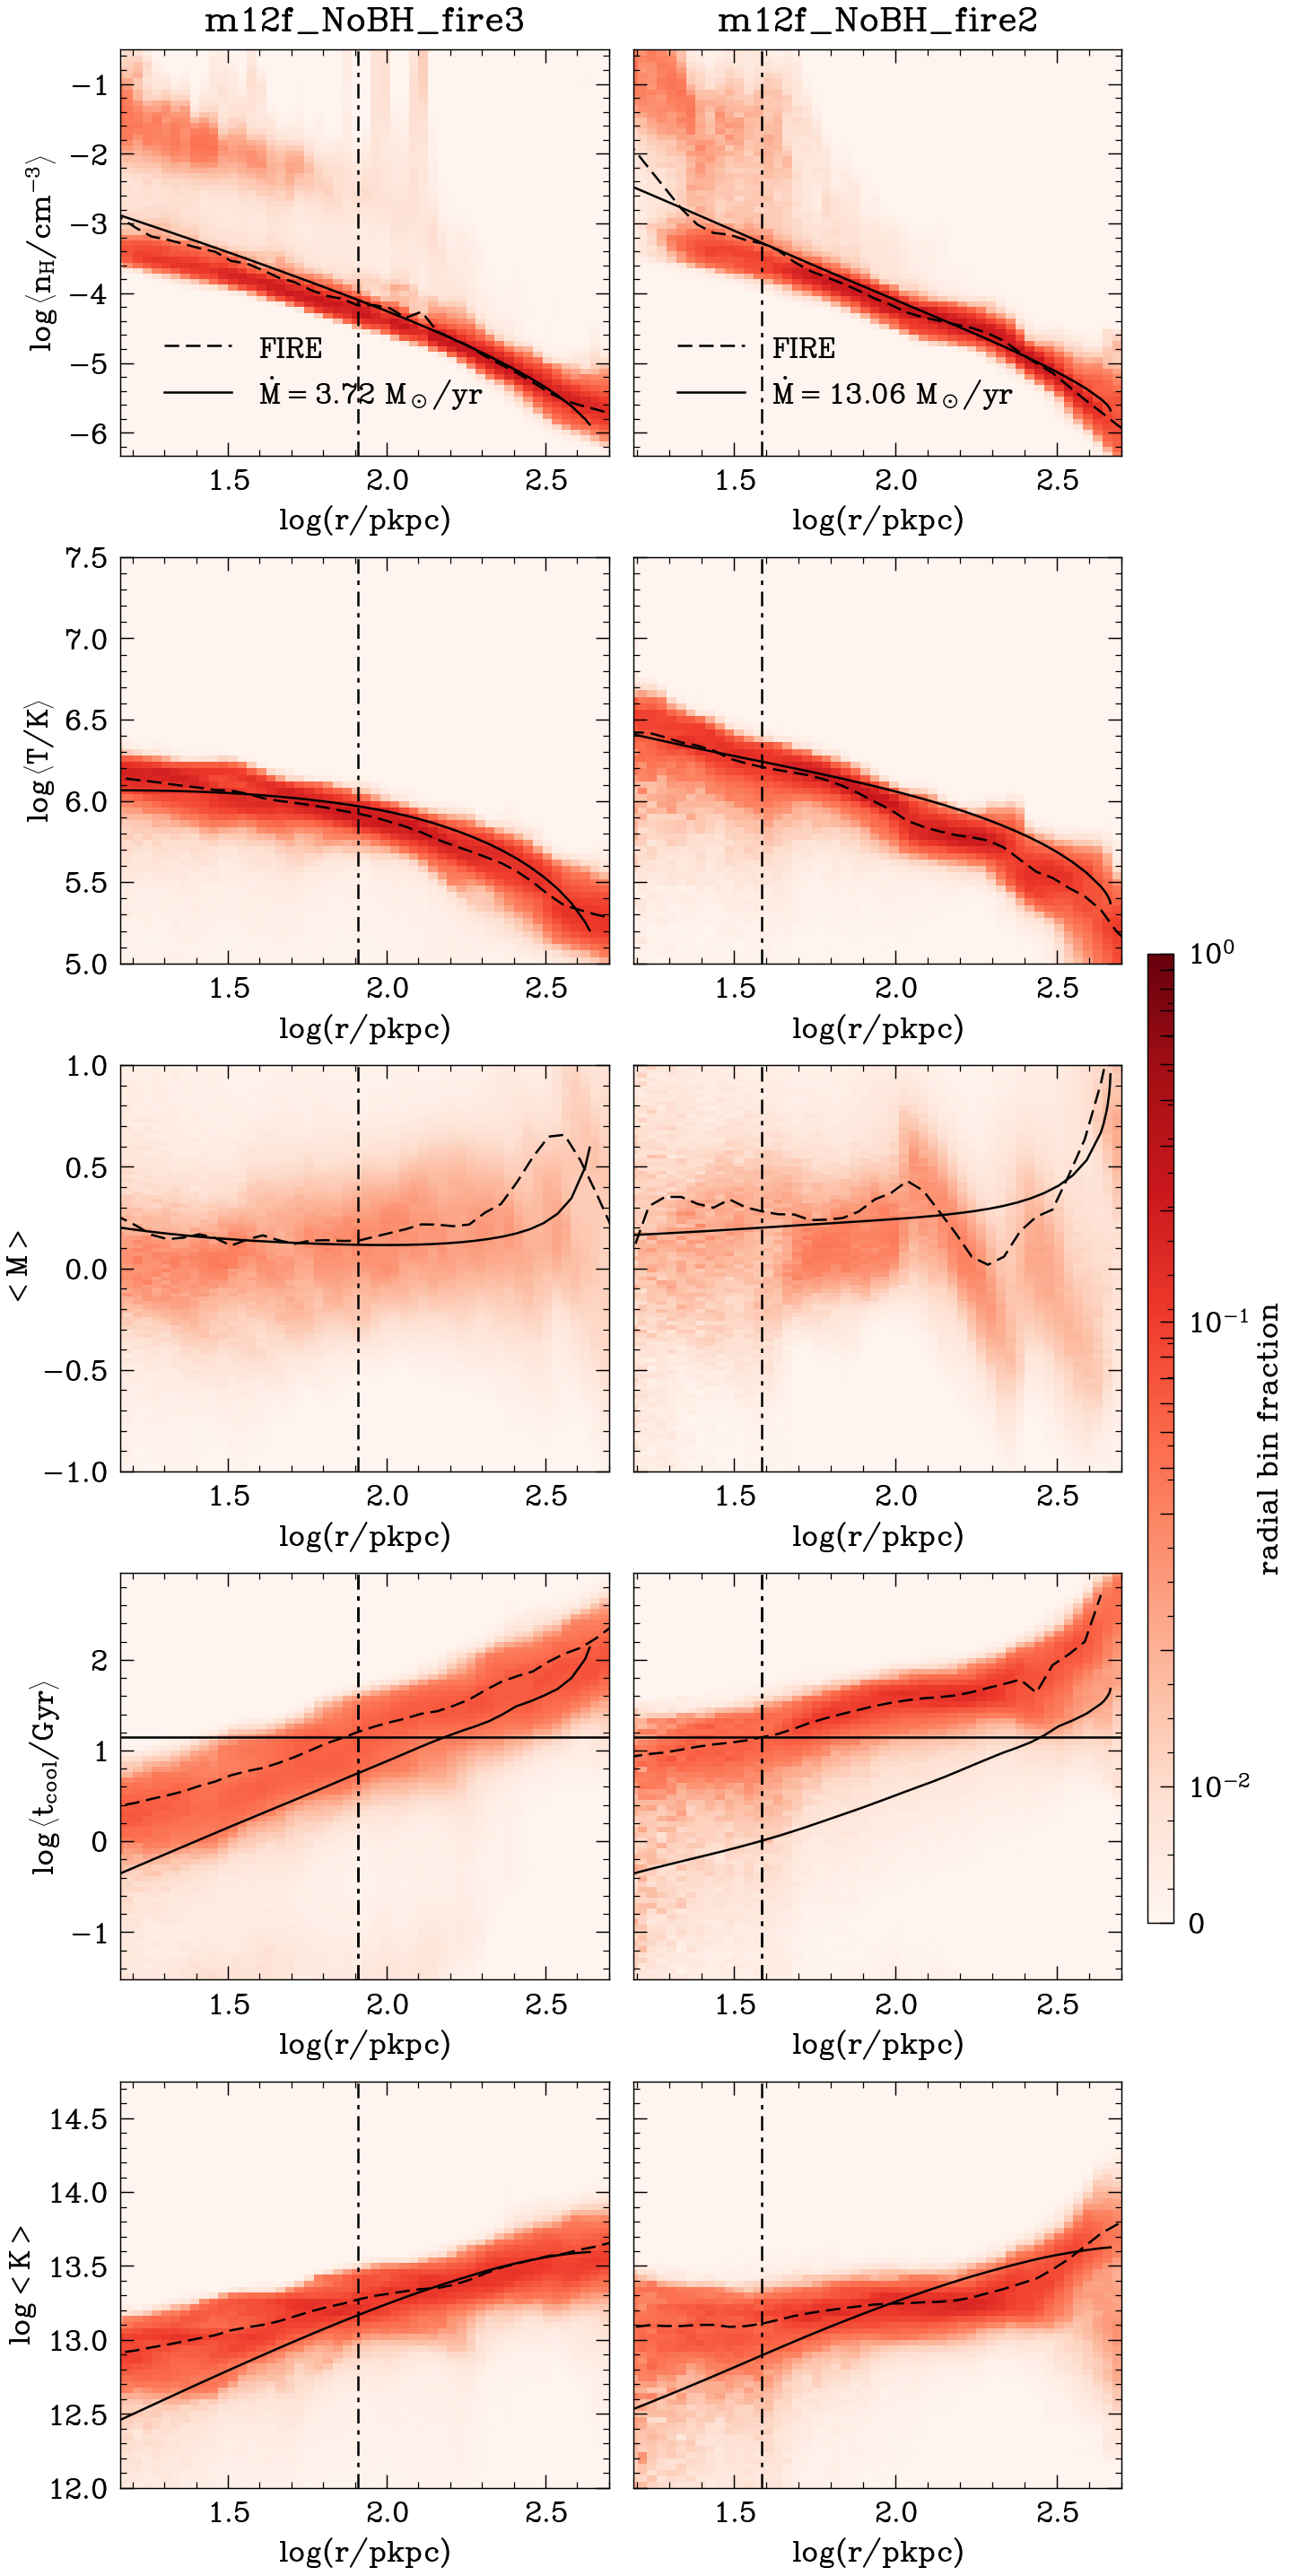

In [10]:
makecoolingflow([res['m12f_NoBH_fire3'][-1], res['m12f_NoBH_fire2'][-1]])